In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# サンプルデータ読み込み
df = pd.read_csv(filepath_or_buffer="/content/drive/My Drive/ensyu3/bike.csv")
#データの確認
display(df.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#統計情報
display(df.describe())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# 年、月、日、曜日、時間の列を追加
df['datetimeobj'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetimeobj'].dt.year
df['month'] = df['datetimeobj'].dt.month
df['day'] = df['datetimeobj'].dt.day
df['dayofweek'] = df['datetimeobj'].dt.dayofweek # 曜日：月曜日が0、日曜日が6
df['hour'] = df['datetimeobj'].dt.hour
display(df.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimeobj,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,5,4


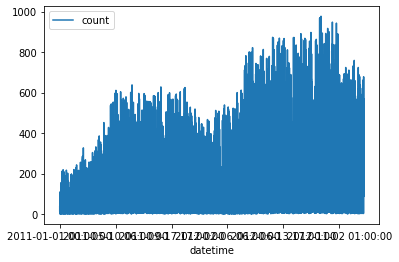

In [ ]:
# 貸し出し数の推移
df.plot(x='datetime', y='count')

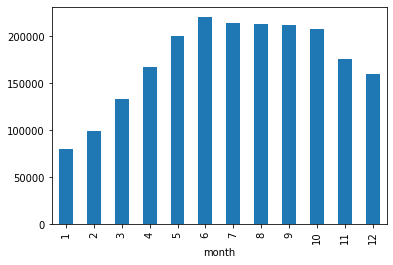

In [ ]:
# 月ごとの貸し出し数（合計）
df.groupby('month')['count'].sum().plot(kind='bar')

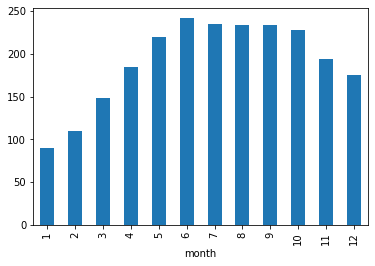

In [ ]:
# 月ごとの貸し出し数（平均）
df.groupby('month')['count'].mean().plot(kind='bar')

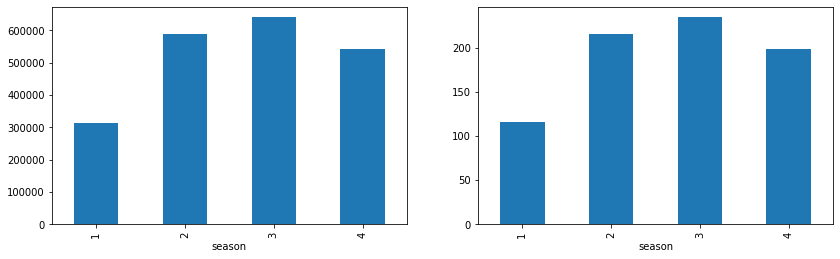

In [ ]:
# 季節ごとの貸し出し数（合計）
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df.groupby('season')['count'].sum().plot(kind='bar')
# 季節ごとの貸し出し数（平均）
plt.subplot(1,2,2)
df.groupby('season')['count'].mean().plot(kind='bar')

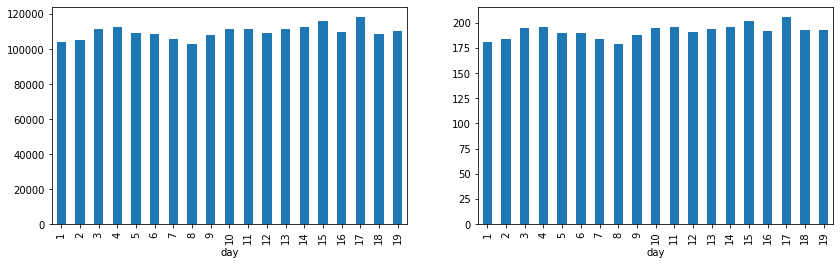

In [ ]:
# 日ごとの貸し出し数（合計）
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df.groupby('day')['count'].sum().plot(kind='bar')
# 日ごとの貸し出し数（平均）
plt.subplot(1,2,2)
df.groupby('day')['count'].mean().plot(kind='bar')

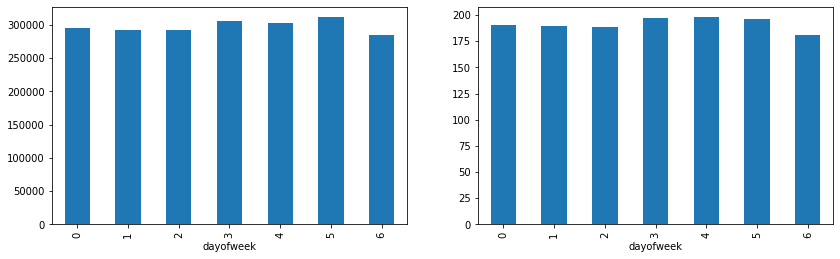

In [ ]:
# 曜日ごとの貸し出し数（合計）
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df.groupby('dayofweek')['count'].sum().plot(kind='bar')
# 曜日ごとの貸し出し数（平均）
plt.subplot(1,2,2)
df.groupby('dayofweek')['count'].mean().plot(kind='bar')

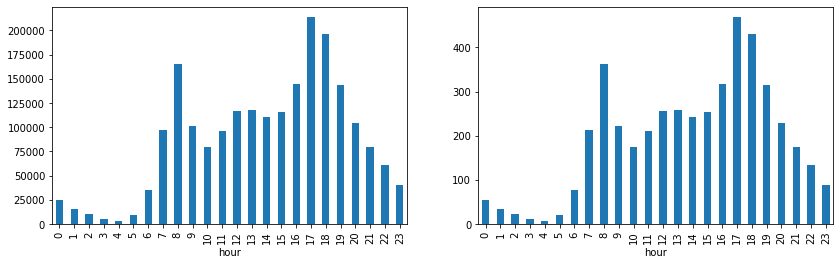

In [ ]:
# 時間ごとの貸し出し数（合計）
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df.groupby('hour')['count'].sum().plot(kind='bar')
# 時間ごとの貸し出し数（平均）
plt.subplot(1,2,2)
df.groupby('hour')['count'].mean().plot(kind='bar')

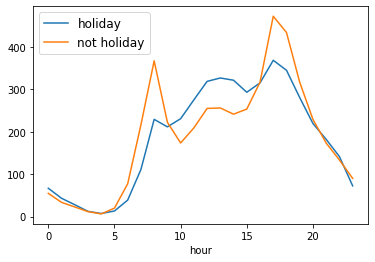

In [ ]:
# holidayかどうか時間ごと平均
plt.figure()
df.query('holiday == 1').groupby('hour')['count'].mean().plot(label='holiday')
df.query('holiday == 0').groupby('hour')['count'].mean().plot(label='not holiday')
plt.legend(fontsize=12)

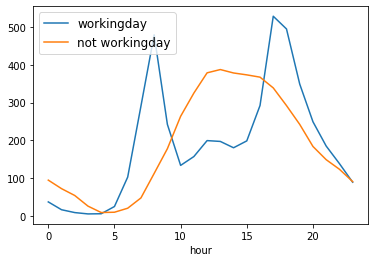

In [ ]:
# workingdayかどうか時間ごと平均
plt.figure()
df.query('workingday == 1').groupby('hour')['count'].mean().plot(label='workingday')
df.query('workingday == 0').groupby('hour')['count'].mean().plot(label='not workingday')
plt.legend(fontsize=12)

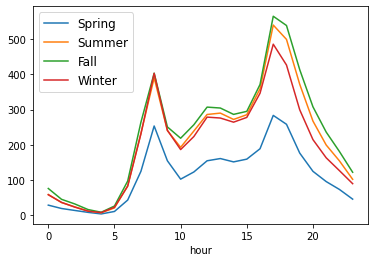

In [ ]:
# 季節による変化
plt.figure()
df.query('season == 1').groupby('hour')['count'].mean().plot(label='Spring')
df.query('season == 2').groupby('hour')['count'].mean().plot(label='Summer')
df.query('season == 3').groupby('hour')['count'].mean().plot(label='Fall')
df.query('season == 4').groupby('hour')['count'].mean().plot(label='Winter')
plt.legend(fontsize=12)

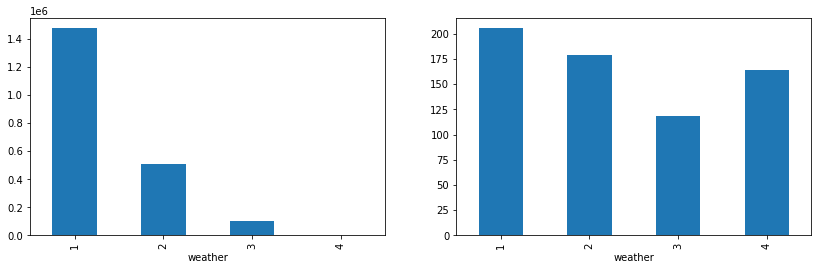

In [ ]:
# 天候ごとの貸し出し数（合計）
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df.groupby('weather')['count'].sum().plot(kind='bar')
# 天候ごとの貸し出し数（平均）
plt.subplot(1,2,2)
df.groupby('weather')['count'].mean().plot(kind='bar')

In [ ]:
# 大雨のデータ件数
print(len(df.query('weather == 4')))

1


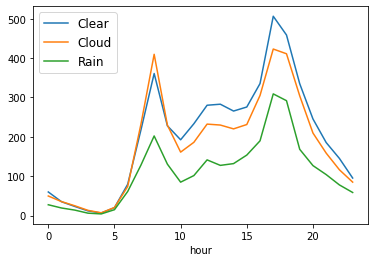

In [ ]:
# 天気による変化
plt.figure()
df.query('weather == 1').groupby('hour')['count'].mean().plot(label='Clear')
df.query('weather == 2').groupby('hour')['count'].mean().plot(label='Cloud')
df.query('weather == 3').groupby('hour')['count'].mean().plot(label='Rain')
plt.legend(fontsize=12)

<Figure size 432x288 with 0 Axes>

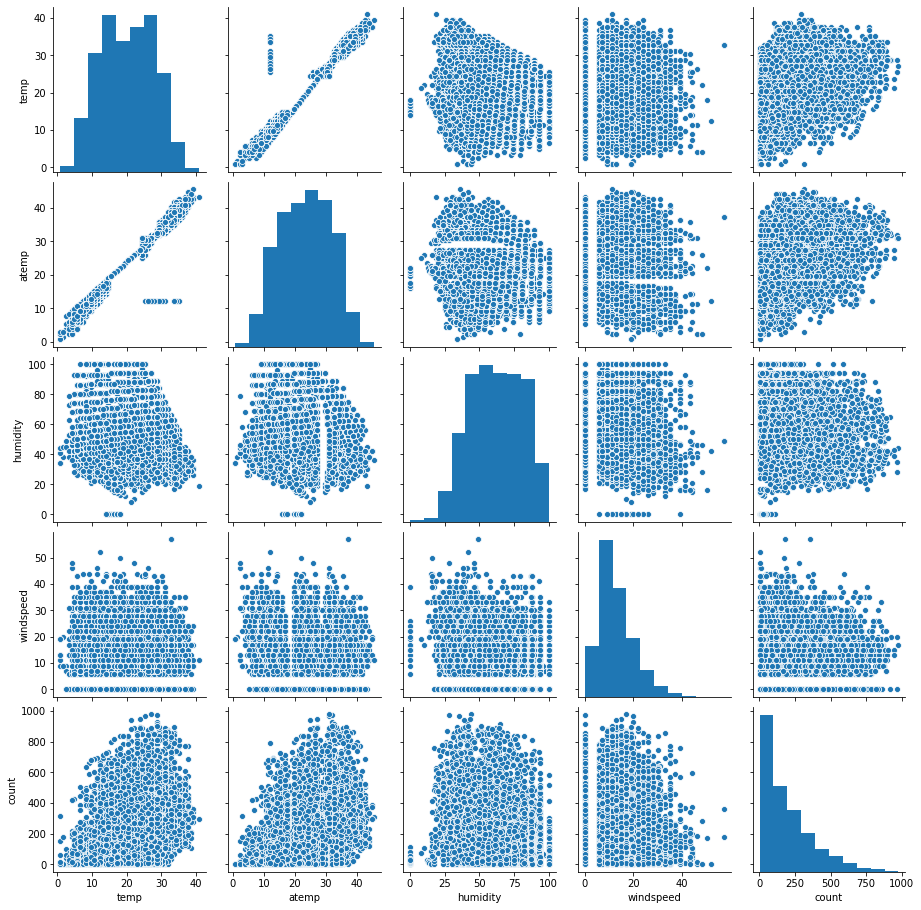

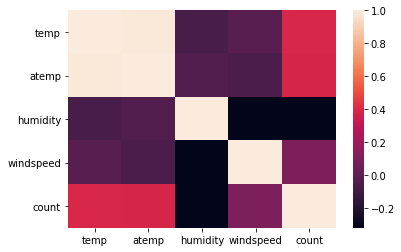

In [ ]:
# 温度、体感温度、湿度、風、貸し出し数
plt.figure()
sns.pairplot(data=df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
# 相関係数をヒートマップで表示
plt.figure()
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr())

<Figure size 432x288 with 0 Axes>

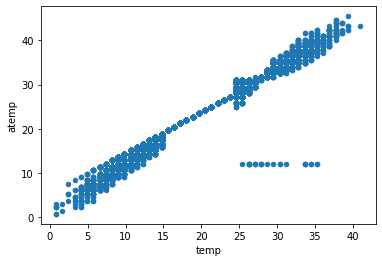

In [ ]:
# 温度と体感温度の関係
plt.figure()
df.plot(x='temp', y='atemp', kind='scatter')

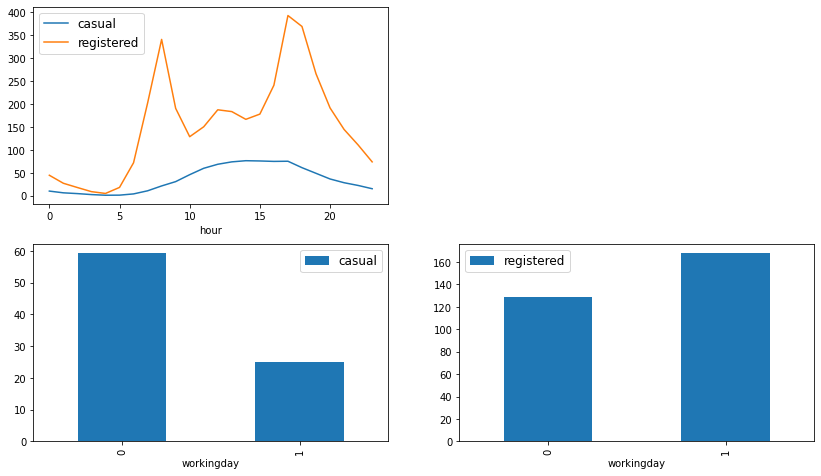

In [ ]:
# 会員、非会員
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('hour')['casual'].mean().plot(label='casual')
df.groupby('hour')['registered'].mean().plot(label='registered')
plt.legend(fontsize=12)
# 会員、非会員
plt.subplot(2,2,3)
df.groupby('workingday')['casual'].mean().plot(label='casual', kind='bar')
plt.legend(fontsize=12)
plt.subplot(2,2,4)
df.groupby('workingday')['registered'].mean().plot(label='registered', kind='bar')
plt.legend(fontsize=12)

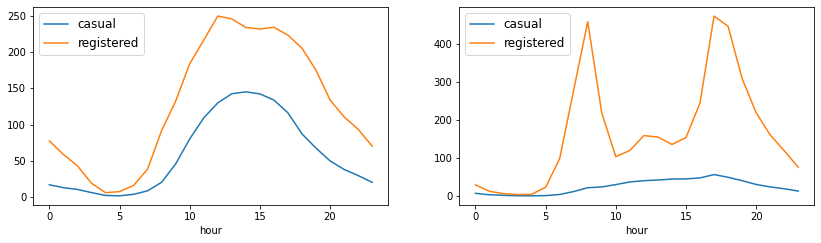

In [ ]:
# 会員、非会員(平日)
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.query('workingday == 0').groupby('hour')['casual'].mean().plot(label='casual')
df.query('workingday == 0').groupby('hour')['registered'].mean().plot(label='registered')
plt.legend(fontsize=12)

# 会員、非会員(休日)
plt.subplot(2,2,2)
df.query('workingday == 1').groupby('hour')['casual'].mean().plot(label='casual')
df.query('workingday == 1').groupby('hour')['registered'].mean().plot(label='registered')
plt.legend(fontsize=12)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
drop_col = ['datetime', 'datetimeobj','count']
df_X = df.drop(drop_col,axis = 1)
df_y = df['count']

#df_X = df[['registered','casual']]
# トレーニングデータとテストデータに分ける
(train_X, test_X, train_y, test_y) = train_test_split(
    df_X, df_y, test_size=0.3, random_state=0)

# ランダムフォレストモデルを生成
# n_estimators 決定木をいくつ生成するか（デフォルトは10）
clf = RandomForestClassifier(random_state=4, n_estimators=20)
clf = clf.fit(train_X, train_y)

# 結果検証
pred = clf.predict(test_X)
df_pred = pd.DataFrame(pred)
#誤差の平均を求める
test_y_reset = test_y.reset_index().drop('index',axis=1)
err_sum = (df_pred[0] - test_y_reset['count']).abs().mean()
print(err_sum)

36.086037966932025


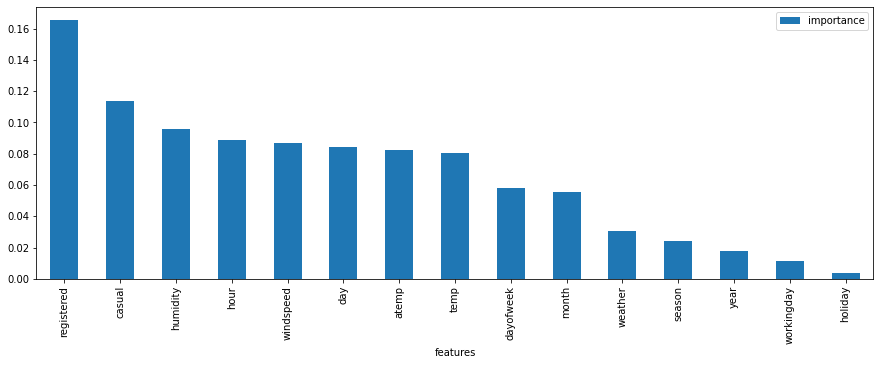

In [ ]:
#特徴量の重要度を表示
clf = clf.fit(train_X, train_y)

default_imp=pd.DataFrame(data={'importance':clf.feature_importances_,'features':train_X.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp=default_imp[:30]
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()